In [1]:
## Import packages
import numpy as np
import pandas as pd
import copy
# from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
train = pd.read_csv('merge_train_text/merged_train_data.csv')
test = pd.read_csv('merge_test_text/merged_test_data.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder #for ordinal data 

labelencoder = LabelEncoder()
train['Polarity_category'] = labelencoder.fit_transform(train['Polarity_category'])
test['Polarity_category'] = labelencoder.fit_transform(test['Polarity_category'])
#transform to int and create new attribute  [col]

In [4]:
print(train.groupby('Polarity_category')['id'].nunique())
print(test.groupby('Polarity_category')['id'].nunique())

Polarity_category
0     4138
1      888
2    15774
Name: id, dtype: int64
Polarity_category
0     967
1     210
2    4023
Name: id, dtype: int64


In [5]:
train.head(5)

,id,title,text,K_means,label,LDA_Dominant_Topic,text_vader_compound,tb_Pol,tb_Subj,Polarity_category
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,2,1,2.0,0.5431,0.026726,0.456226,2
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,1,0,2.0,-0.4405,0.077613,0.485211,2
2,2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",2,1,0.0,0.9853,0.083994,0.418484,2
3,3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,2,1,0.0,-0.9993,0.021485,0.251616,2
4,4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,2,1,0.0,-0.9517,0.047143,0.197143,2


In [6]:
train['K_means'].value_counts().sort_index()

0     1114
1     1656
2    10298
3     5073
4     2659
Name: K_means, dtype: int64

In [7]:
train_kmeans_count = pd.DataFrame(train['K_means'].value_counts().sort_index(),columns=['K_means'])
train_kmeans_count

,K_means
0,1114
1,1656
2,10298
3,5073
4,2659


In [8]:
train_lda_count = pd.DataFrame(train['LDA_Dominant_Topic'].value_counts().sort_index(),columns=['LDA_Dominant_Topic'])
train_lda_count

,LDA_Dominant_Topic
0.0,6598
1.0,2711
2.0,6668
3.0,4347
4.0,476


In [9]:
test.head(5)

,id,title,text,K_means,LDA_Dominant_Topic,text_vader_compound,text_vader_neg,text_vader_neu,text_vader_pos,tb_Pol,tb_Subj,Polarity_category
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...",0,1.0,0.9957,0.028,0.898,0.074,0.071113,0.411889,2
1,20801,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,1,4.0,-0.9670,0.171,0.729,0.100,0.076509,0.314263,2
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,1,1.0,-0.9926,0.113,0.839,0.047,-0.012060,0.343737,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...",0,1.0,0.9981,0.023,0.839,0.138,0.154540,0.427795,2
4,20804,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1,2.0,0.7650,0.012,0.908,0.080,0.111806,0.335417,2


In [10]:
test['K_means'].value_counts().sort_index()

0    1312
1    2458
2     386
3     790
4     254
Name: K_means, dtype: int64

In [11]:
test_kmeans_count = pd.DataFrame(test['K_means'].value_counts().sort_index(),columns=['K_means'])
test_kmeans_count

,K_means
0,1312
1,2458
2,386
3,790
4,254


In [12]:
test_lda_count = pd.DataFrame(test['LDA_Dominant_Topic'].value_counts().sort_index(),columns=['LDA_Dominant_Topic'])
test_lda_count

,LDA_Dominant_Topic
0.0,1009
1.0,1955
2.0,1318
3.0,61
4.0,857


In [13]:
print (test.shape)
print(train.shape)

(5200, 12)
(20800, 10)


In [14]:
# np.array_equal(train.id, train.id.astype(int))

In [15]:
print('train')
print(train.isna().sum().sort_values(ascending = False))
print("=============")
print('test')
print(test.isna().sum().sort_values(ascending = False))

train
Polarity_category      0
tb_Subj                0
tb_Pol                 0
text_vader_compound    0
LDA_Dominant_Topic     0
label                  0
K_means                0
text                   0
title                  0
id                     0
dtype: int64
test
Polarity_category      0
tb_Subj                0
tb_Pol                 0
text_vader_pos         0
text_vader_neu         0
text_vader_neg         0
text_vader_compound    0
LDA_Dominant_Topic     0
K_means                0
text                   0
title                  0
id                     0
dtype: int64


In [16]:
# make a copy of the dataframe in case 
train_original = copy.deepcopy(train)

In [17]:
label_counts = train["label"].value_counts()

#see distribution of 1 and 0 labels 
label_counts

1    10413
0    10387
Name: label, dtype: int64

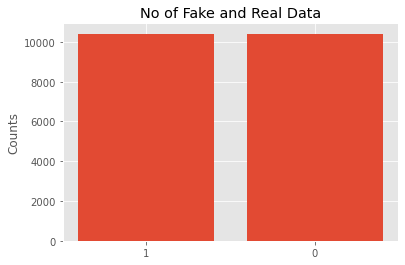

In [18]:
bar = plt.bar(label_counts.index.astype('str'), label_counts)
plt.ylabel('Counts')
plt.title('No of Fake and Real Data')


plt.show()

In [19]:
train.isna().sum().sort_values(ascending = False)

Polarity_category      0
tb_Subj                0
tb_Pol                 0
text_vader_compound    0
LDA_Dominant_Topic     0
label                  0
K_means                0
text                   0
title                  0
id                     0
dtype: int64

# Text pre processing 

In [20]:
# basic pre-processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

from wordcloud import WordCloud

In [21]:
def nans(train): 
    return train[train.isnull().any(axis=1)]
nans(train)

,id,title,text,K_means,label,LDA_Dominant_Topic,text_vader_compound,tb_Pol,tb_Subj,Polarity_category


In [22]:
def nans(test): 
    return test[test.isnull().any(axis=1)]
nans(test)

,id,title,text,K_means,LDA_Dominant_Topic,text_vader_compound,text_vader_neg,text_vader_neu,text_vader_pos,tb_Pol,tb_Subj,Polarity_category


In [23]:
# train = train.dropna(subset=['title', 'text'])
# test = test.dropna(subset=['title', 'text'])

test=test.fillna(' ')
train=train.fillna(' ')

In [24]:

#b4 pre processing 

In [25]:
# basic pre-processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


#remove stop words 
#lemmetization instead of stemmer 

def preprocess(review):
    review = " ".join([stemmer.stem(w.lower()) for w in word_tokenize(re.sub('[^a-zA-Z]+', ' ', review.replace("<br />", ""))) if not w in stop_words])
    return review


#cleaning all text from both test and train set 
train['text_clean'] = train.apply(lambda x: preprocess(x['text']), axis=1)
test['text_clean'] = test.apply(lambda x: preprocess(x['text']), axis=1) 

In [26]:
test.head()

,id,title,text,K_means,LDA_Dominant_Topic,text_vader_compound,text_vader_neg,text_vader_neu,text_vader_pos,tb_Pol,tb_Subj,Polarity_category,text_clean
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...",0,1.0,0.9957,0.028,0.898,0.074,0.071113,0.411889,2,palo alto calif after year scorn polit process...
1,20801,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,1,4.0,-0.9670,0.171,0.729,0.100,0.076509,0.314263,2,russian warship readi strike terrorist near al...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,1,1.0,-0.9926,0.113,0.839,0.047,-0.012060,0.343737,0,video nodapl nativ american leader vow stay al...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...",0,1.0,0.9981,0.023,0.839,0.138,0.154540,0.427795,2,if first succeed tri differ sport tim tebow he...
4,20804,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1,2.0,0.7650,0.012,0.908,0.080,0.111806,0.335417,2,min ago view comment like for first time histo...


In [27]:
# one hot encoding to for k means data - train 
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
kmeans_onehot_train = pd.DataFrame(enc.fit_transform(train[['K_means']]).toarray())
# merge with main df bridge_df on key values
# test = train.join(enc_df)
# test.head(5)
kmeans_onehot_train.head(2)

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0


In [28]:
# one hot encoding to for lda data - train 

from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
lda_enc_train = pd.DataFrame(enc.fit_transform(train[['LDA_Dominant_Topic']]).toarray())
# merge with main df bridge_df on key values
# test = train.join(enc_df)
# test.head(5)
lda_enc_train.head(2)

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [29]:
# one hot encoding to for k means data - test 

from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
kmeans_onehot_test = pd.DataFrame(enc.fit_transform(test[['K_means']]).toarray())
# merge with main df bridge_df on key values
# test = train.join(enc_df)
# test.head(5)
kmeans_onehot_test.head(2)

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0


In [30]:
# one hot encoding to for lda data - test 

from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
lda_enc_test = pd.DataFrame(enc.fit_transform(test[['LDA_Dominant_Topic']]).toarray())
# merge with main df bridge_df on key values
# test = train.join(enc_df)
# test.head(5)
lda_enc_test.head()

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


# Logistic regression - Count vectorizer 

# Textblob K means 

In [31]:
vectorizer = TfidfVectorizer()
train_counts = vectorizer.fit_transform(train['text_clean'])
test_counts = vectorizer.transform(test['text_clean'])

In [32]:
(train_counts, test_counts)

(<20800x110477 sparse matrix of type '<class 'numpy.float64'>'
 	with 5316572 stored elements in Compressed Sparse Row format>,
 <5200x110477 sparse matrix of type '<class 'numpy.float64'>'
 	with 1336821 stored elements in Compressed Sparse Row format>)

In [33]:
train_counts.shape

(20800, 110477)

In [34]:
test_counts.shape

(5200, 110477)

In [35]:
#Textblob K means 

train_counts = hstack((train_counts,np.array(kmeans_onehot_train[0])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(kmeans_onehot_train[1])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(kmeans_onehot_train[2])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(kmeans_onehot_train[3])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(kmeans_onehot_train[4])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(train['Polarity_category'])[:,None])).tocsr() 

test_counts = hstack((test_counts,np.array(kmeans_onehot_test[0])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(kmeans_onehot_test[1])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(kmeans_onehot_test[2])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(kmeans_onehot_test[3])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(kmeans_onehot_test[4])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(test['Polarity_category'])[:,None])).tocsr() 

In [36]:
(train_counts, test_counts)

(<20800x110483 sparse matrix of type '<class 'numpy.float64'>'
 	with 5354034 stored elements in Compressed Sparse Row format>,
 <5200x110483 sparse matrix of type '<class 'numpy.float64'>'
 	with 1346254 stored elements in Compressed Sparse Row format>)

In [37]:
y = train['label']
y.sample(5)
print(y.shape)

(20800,)


In [38]:
# split dataset to training and test dataset

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test
data_train, data_val, y_train, y_val = train_test_split(train_counts, y, 
                                                          test_size = 0.25, random_state = 2020, stratify = train['label'])

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from datetime import datetime

start=datetime.now()
lr = LogisticRegression(max_iter = 6000)

# train model

lr.fit(data_train, y_train)

lr_pred = lr.predict(data_val)
print('Logistic Regression Vader LDA')
print('Accuracy:')
print(lr.score(data_val, y_val))
print('Confusion Matrix:')
print(confusion_matrix(y_val, lr_pred))
print('Time taken:')
print(datetime.now()-start)

Logistic Regression Vader LDA
Accuracy:
0.9482692307692308
Confusion Matrix:
[[2381  216]
 [  53 2550]]
Time taken:
0:00:09.413423


TN: 2381
FN: 53
FP: 216
TP: 2550


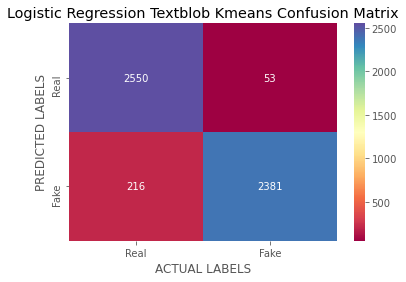

In [40]:
import seaborn as sns


tn, fp, fn, tp = confusion_matrix(y_val, lr_pred).ravel()
cm = [[tp,fn],[fp,tn]]

print("TN:", tn)
print("FN:", fn)
print("FP:", fp)
print("TP:", tp)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('ACTUAL LABELS');ax.set_ylabel('PREDICTED LABELS'); 
ax.set_title('Logistic Regression Textblob Kmeans Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Real', 'Fake']); ax.yaxis.set_ticklabels(['Real', 'Fake']);


In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, data_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean()*100.0)

Cross-Validation Accuracy Scores 94.9423076923077


In [42]:
predictions_lr = lr.predict(test_counts)

pred_lr=pd.DataFrame(predictions_lr,columns=['label'])
pred_lr['id']=test['id']
pred_lr.groupby('label').count()

,id
label,
0,2727
1,2473


In [43]:
pred_lr.to_csv('log_reg_countvect_textblobKmeans.csv', index=False)
log_reg = pd.read_csv('log_reg_countvect_textblobKmeans.csv')
log_reg.isna().sum().sort_values(ascending = False)

id       0
label    0
dtype: int64

# Textblob LDA 

In [44]:
vectorizer = TfidfVectorizer()
train_counts = vectorizer.fit_transform(train['text_clean'])
test_counts = vectorizer.transform(test['text_clean'])

In [45]:
(train_counts, test_counts)

(<20800x110477 sparse matrix of type '<class 'numpy.float64'>'
 	with 5316572 stored elements in Compressed Sparse Row format>,
 <5200x110477 sparse matrix of type '<class 'numpy.float64'>'
 	with 1336821 stored elements in Compressed Sparse Row format>)

In [46]:
train_counts.shape

(20800, 110477)

In [47]:
test_counts.shape

(5200, 110477)

In [48]:
# ## Textblob LDA 

train_counts = hstack((train_counts,np.array(lda_enc_train[0])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(lda_enc_train[1])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(lda_enc_train[2])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(lda_enc_train[3])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(lda_enc_train[4])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(train['Polarity_category'])[:,None])).tocsr() 

test_counts = hstack((test_counts,np.array(lda_enc_test[0])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(lda_enc_test[1])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(lda_enc_test[2])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(lda_enc_test[3])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(lda_enc_test[4])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(test['Polarity_category'])[:,None])).tocsr() 

In [49]:
(train_counts, test_counts)

(<20800x110483 sparse matrix of type '<class 'numpy.float64'>'
 	with 5354034 stored elements in Compressed Sparse Row format>,
 <5200x110483 sparse matrix of type '<class 'numpy.float64'>'
 	with 1346254 stored elements in Compressed Sparse Row format>)

In [50]:
y = train['label']
y.sample(5)
print(y.shape)

(20800,)


In [51]:
# split dataset to training and test dataset

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test
data_train, data_val, y_train, y_val = train_test_split(train_counts, y, 
                                                          test_size = 0.25, random_state = 2020, stratify = train['label'])

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from datetime import datetime

start=datetime.now()
lr = LogisticRegression(max_iter = 6000)

# train model

lr.fit(data_train, y_train)

lr_pred = lr.predict(data_val)
print('Logistic Regression Vader LDA')
print('Accuracy:')
print(lr.score(data_val, y_val))
print('Confusion Matrix:')
print(confusion_matrix(y_val, lr_pred))
print('Time taken:')
print(datetime.now()-start)

Logistic Regression Vader LDA
Accuracy:
0.9382692307692307
Confusion Matrix:
[[2414  183]
 [ 138 2465]]
Time taken:
0:00:09.606980


TN: 2414
FN: 138
FP: 183
TP: 2465


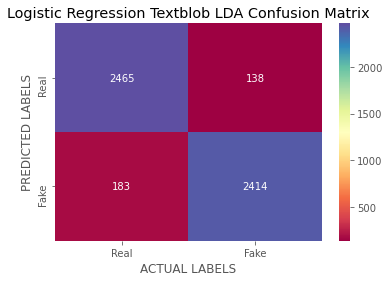

In [53]:
import seaborn as sns


tn, fp, fn, tp = confusion_matrix(y_val, lr_pred).ravel()
cm = [[tp,fn],[fp,tn]]

print("TN:", tn)
print("FN:", fn)
print("FP:", fp)
print("TP:", tp)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('ACTUAL LABELS');ax.set_ylabel('PREDICTED LABELS'); 
ax.set_title('Logistic Regression Textblob LDA Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Real', 'Fake']); ax.yaxis.set_ticklabels(['Real', 'Fake']);


In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, data_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean()*100.0)

Cross-Validation Accuracy Scores 93.55769230769229


In [55]:
predictions_lr = lr.predict(test_counts)

pred_lr=pd.DataFrame(predictions_lr,columns=['label'])
pred_lr['id']=test['id']
pred_lr.groupby('label').count()

,id
label,
0,2330
1,2870


In [56]:
pred_lr.to_csv('log_reg_countvect_textbloblda.csv', index=False)
log_reg = pd.read_csv('log_reg_countvect_textbloblda.csv')
log_reg.isna().sum().sort_values(ascending = False)

id       0
label    0
dtype: int64

# VADER K means 


In [57]:
vectorizer = TfidfVectorizer()
train_counts = vectorizer.fit_transform(train['text_clean'])
test_counts = vectorizer.transform(test['text_clean'])

In [58]:
(train_counts, test_counts)

(<20800x110477 sparse matrix of type '<class 'numpy.float64'>'
 	with 5316572 stored elements in Compressed Sparse Row format>,
 <5200x110477 sparse matrix of type '<class 'numpy.float64'>'
 	with 1336821 stored elements in Compressed Sparse Row format>)

In [59]:
train_counts.shape

(20800, 110477)

In [60]:
test_counts.shape

(5200, 110477)

In [61]:
# Vader K means 
train_counts = hstack((train_counts,np.array(kmeans_onehot_train[0])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(kmeans_onehot_train[1])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(kmeans_onehot_train[2])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(kmeans_onehot_train[3])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(kmeans_onehot_train[4])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(train['text_vader_compound'])[:,None])).tocsr() 

test_counts = hstack((test_counts,np.array(kmeans_onehot_test[0])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(kmeans_onehot_test[1])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(kmeans_onehot_test[2])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(kmeans_onehot_test[3])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(kmeans_onehot_test[4])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(test['text_vader_compound'])[:,None])).tocsr() 

In [62]:
(train_counts, test_counts)

(<20800x110483 sparse matrix of type '<class 'numpy.float64'>'
 	with 5357611 stored elements in Compressed Sparse Row format>,
 <5200x110483 sparse matrix of type '<class 'numpy.float64'>'
 	with 1347060 stored elements in Compressed Sparse Row format>)

In [63]:
y = train['label']
y.sample(5)
print(y.shape)

(20800,)


In [64]:
# split dataset to training and test dataset

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test
data_train, data_val, y_train, y_val = train_test_split(train_counts, y, 
                                                          test_size = 0.25, random_state = 2020, stratify = train['label'])

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from datetime import datetime

start=datetime.now()
lr = LogisticRegression(max_iter = 6000)

# train model

lr.fit(data_train, y_train)

lr_pred = lr.predict(data_val)
print('Logistic Regression Vader Kmeans')
print('Accuracy:')
print(lr.score(data_val, y_val))
print('Confusion Matrix:')
print(confusion_matrix(y_val, lr_pred))
print('Time taken:')
print(datetime.now()-start)

Logistic Regression Vader Kmeans
Accuracy:
0.9494230769230769
Confusion Matrix:
[[2385  212]
 [  51 2552]]
Time taken:
0:00:07.489097


TN: 2385
FN: 51
FP: 212
TP: 2552


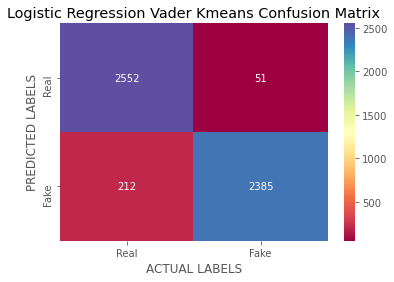

In [66]:
import seaborn as sns


tn, fp, fn, tp = confusion_matrix(y_val, lr_pred).ravel()
cm = [[tp,fn],[fp,tn]]

print("TN:", tn)
print("FN:", fn)
print("FP:", fp)
print("TP:", tp)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('ACTUAL LABELS');ax.set_ylabel('PREDICTED LABELS'); 
ax.set_title('Logistic Regression Vader Kmeans Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Real', 'Fake']); ax.yaxis.set_ticklabels(['Real', 'Fake']);


In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, data_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean()*100.0)

Cross-Validation Accuracy Scores 94.94871794871796


In [68]:
predictions_lr = lr.predict(test_counts)

pred_lr=pd.DataFrame(predictions_lr,columns=['label'])
pred_lr['id']=test['id']
pred_lr.groupby('label').count()

,id
label,
0,2728
1,2472


In [69]:
pred_lr.to_csv('log_reg_countvect_vaderKmeans.csv', index=False)
log_reg = pd.read_csv('log_reg_countvect_vaderKmeans.csv')
log_reg.isna().sum().sort_values(ascending = False)

id       0
label    0
dtype: int64

# VADER LDA

In [70]:
vectorizer = TfidfVectorizer()
train_counts = vectorizer.fit_transform(train['text_clean'])
test_counts = vectorizer.transform(test['text_clean'])

In [71]:
(train_counts, test_counts)

(<20800x110477 sparse matrix of type '<class 'numpy.float64'>'
 	with 5316572 stored elements in Compressed Sparse Row format>,
 <5200x110477 sparse matrix of type '<class 'numpy.float64'>'
 	with 1336821 stored elements in Compressed Sparse Row format>)

In [72]:
print(train_counts.shape)
print(test_counts.shape)

(20800, 110477)
(5200, 110477)


In [73]:
# VADER LDA

train_counts = hstack((train_counts,np.array(lda_enc_train[0])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(lda_enc_train[1])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(lda_enc_train[2])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(lda_enc_train[3])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(lda_enc_train[4])[:,None])).tocsr() 
train_counts = hstack((train_counts,np.array(train['text_vader_compound'])[:,None])).tocsr() 

test_counts = hstack((test_counts,np.array(lda_enc_test[0])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(lda_enc_test[1])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(lda_enc_test[2])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(lda_enc_test[3])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(lda_enc_test[4])[:,None])).tocsr() 
test_counts = hstack((test_counts,np.array(test['text_vader_compound'])[:,None])).tocsr() 

In [74]:
(train_counts, test_counts)

(<20800x110483 sparse matrix of type '<class 'numpy.float64'>'
 	with 5357611 stored elements in Compressed Sparse Row format>,
 <5200x110483 sparse matrix of type '<class 'numpy.float64'>'
 	with 1347060 stored elements in Compressed Sparse Row format>)

In [75]:
y = train['label']
y.sample(5)
print(y.shape)

(20800,)


In [76]:
# split dataset to training and test dataset

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test
data_train, data_val, y_train, y_val = train_test_split(train_counts, y, 
                                                          test_size = 0.25, random_state = 2020, stratify = train['label'])

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from datetime import datetime

start=datetime.now()
lr = LogisticRegression(max_iter = 6000)

# train model

lr.fit(data_train, y_train)

lr_pred = lr.predict(data_val)
print('Logistic Regression Vader LDA')
print('Accuracy:')
print(lr.score(data_val, y_val))
print('Confusion Matrix:')
print(confusion_matrix(y_val, lr_pred))
print('Time taken:')
print(datetime.now()-start)

Logistic Regression Vader LDA
Accuracy:
0.9382692307692307
Confusion Matrix:
[[2418  179]
 [ 142 2461]]
Time taken:
0:00:08.611539


TN: 2418
FN: 142
FP: 179
TP: 2461


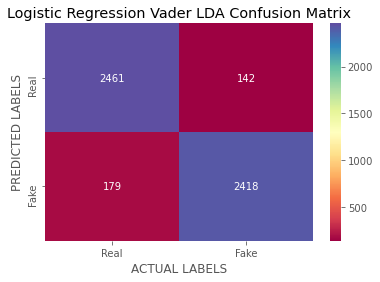

In [78]:
import seaborn as sns


tn, fp, fn, tp = confusion_matrix(y_val, lr_pred).ravel()
cm = [[tp,fn],[fp,tn]]

print("TN:", tn)
print("FN:", fn)
print("FP:", fp)
print("TP:", tp)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('ACTUAL LABELS');ax.set_ylabel('PREDICTED LABELS'); 
ax.set_title('Logistic Regression Vader LDA Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Real', 'Fake']); ax.yaxis.set_ticklabels(['Real', 'Fake']);


In [79]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, data_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean()*100.0)

Cross-Validation Accuracy Scores 93.49358974358975


In [80]:
predictions_lr = lr.predict(test_counts)

pred_lr=pd.DataFrame(predictions_lr,columns=['label'])
pred_lr['id']=test['id']
pred_lr.groupby('label').count()

,id
label,
0,2329
1,2871


In [81]:
pred_lr.to_csv('log_reg_countvect_vaderLDA.csv', index=False)
log_reg = pd.read_csv('log_reg_countvect_vaderLDA.csv')
log_reg.isna().sum().sort_values(ascending = False)

id       0
label    0
dtype: int64